# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

O objetivo desse projeto é prever a renda de clientes com base em suas caracteristicas. Essa previsão pode ser utilizada para analise de credito, definição de limites e concessão de crédito em instituições financeiras

- **Objetivo:** Prever a renda dos clientes a partir de dados cadastrais.
- **Aplicação:** Apoiar decisões de crédito e oferta de produtos financeiros.
- **Benefícios:** Redução de inadimplência, melhor segmentação de clientes e aumento da eficiência operacional.
- **Desafios:** Garantir a qualidade dos dados, lidar com informações faltantes e construir um modelo robusto e interpretável.


## Etapa 2 Crisp-DM: Entendimento dos dados

O conjunto de dados possui 15.000 registros e 15 variáveis, contendo informações cadastrais e socioeconômicas dos clientes, como sexo, idade, estado civil, escolaridade, tipo de renda, quantidade de filhos, posse de veículo e imóvel, tempo de emprego, quantidade de pessoas na residência e renda.


### Dicionário de dados



| Variável                | Descrição                                                        | Tipo           |
| ----------------------- |:----------------------------------------------------------------:| --------------:|
| data_ref                | Data de referência do registro                                   | Data (string)  |
| id_cliente              | Identificador único do cliente                                   | Inteiro        |
| sexo                    | Sexo do cliente (F: Feminino, M: Masculino)                      | Categórico     |
| posse_de_veiculo        | Indica se o cliente possui veículo próprio                       | Booleano       |
| posse_de_imovel         | Indica se o cliente possui imóvel próprio                        | Booleano       |
| qtd_filhos              | Quantidade de filhos do cliente                                  | Inteiro        |
| tipo_renda              | Tipo de fonte de renda do cliente                                | Categórico     |
| educacao                | Nível de escolaridade do cliente                                 | Categórico     |
| estado_civil            | Estado civil do cliente                                          | Categórico     |
| tipo_residencia         | Tipo de residência do cliente                                    | Categórico     |
| idade                   | Idade do cliente em anos                                         | Inteiro        |
| tempo_emprego           | Tempo de emprego atual em anos                                   | Contínuo       |
| qt_pessoas_residencia   | Quantidade de pessoas na residência do cliente                   | Contínuo       |
| renda                   | Renda mensal do cliente em reais                                | Contínuo       |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
df = pd.read_csv('./input/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [3]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 21.90it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




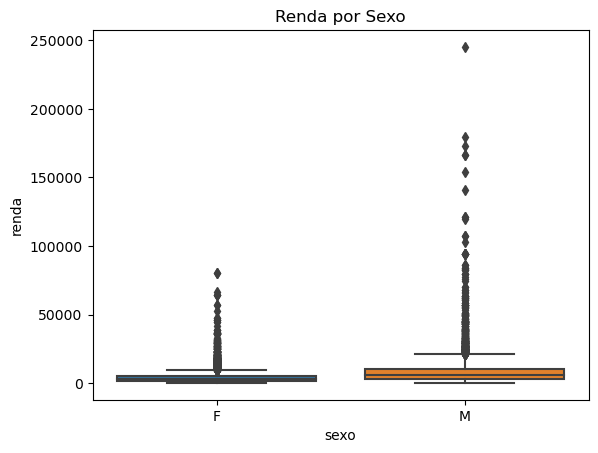

In [5]:
# Relação entre sexo e renda
sns.boxplot(x='sexo', y='renda', data=df)
plt.title('Renda por Sexo')
plt.show()

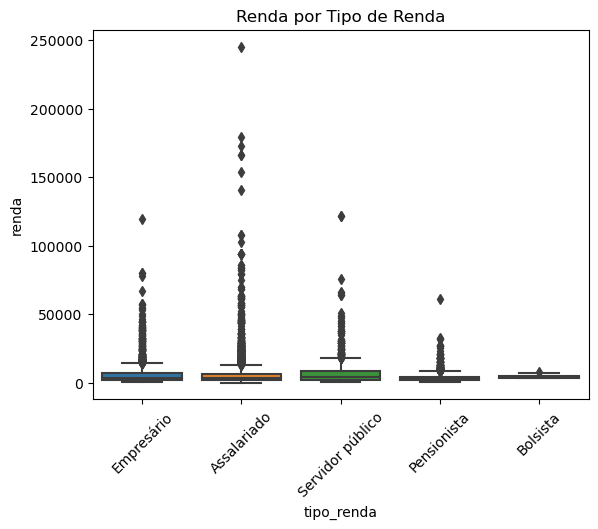

In [6]:
# Relação entre tipo de renda e renda
sns.boxplot(x='tipo_renda', y='renda', data=df)
plt.title('Renda por Tipo de Renda')
plt.xticks(rotation=45)
plt.show()

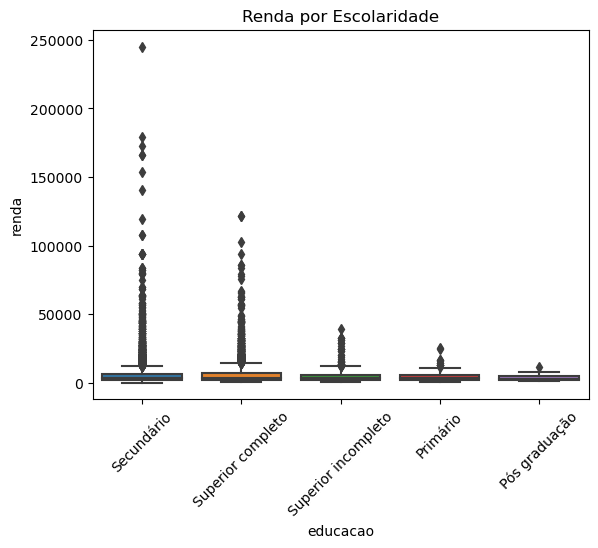

In [7]:
# Relação entre escolaridade e renda
sns.boxplot(x='educacao', y='renda', data=df)
plt.title('Renda por Escolaridade')
plt.xticks(rotation=45)
plt.show()

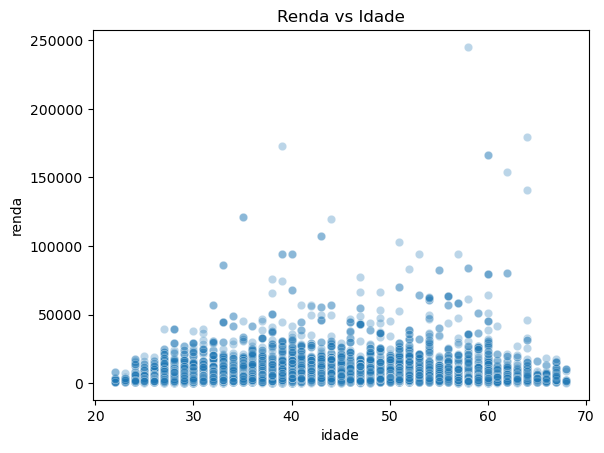

In [8]:
# Relação entre idade e renda
sns.scatterplot(x='idade', y='renda', data=df, alpha=0.3)
plt.title('Renda vs Idade')
plt.show()

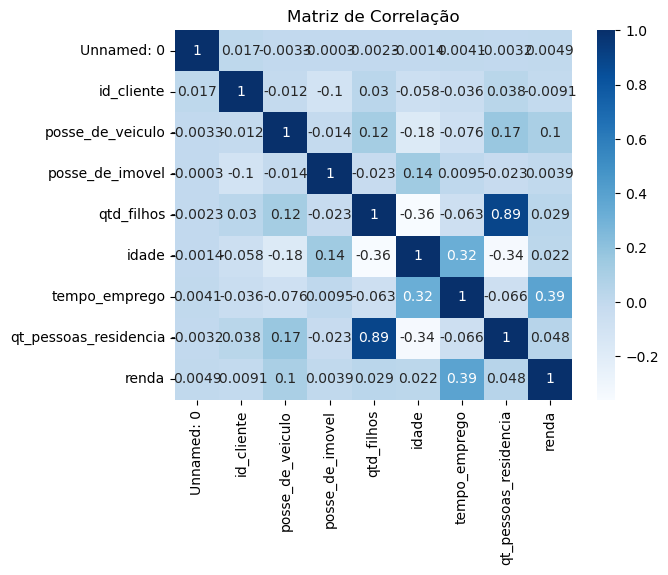

In [9]:
# Correlação entre variáveis numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [10]:
# Verificando valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)

Valores faltantes por coluna:
 Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [11]:
# Preenchendo valores faltantes em 'tempo_emprego' com a mediana
df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)

In [12]:
# Removendo coluna desnecessária 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Transformando data_ref em datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [14]:
# Conferindo dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   id_cliente             15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          15000 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  r

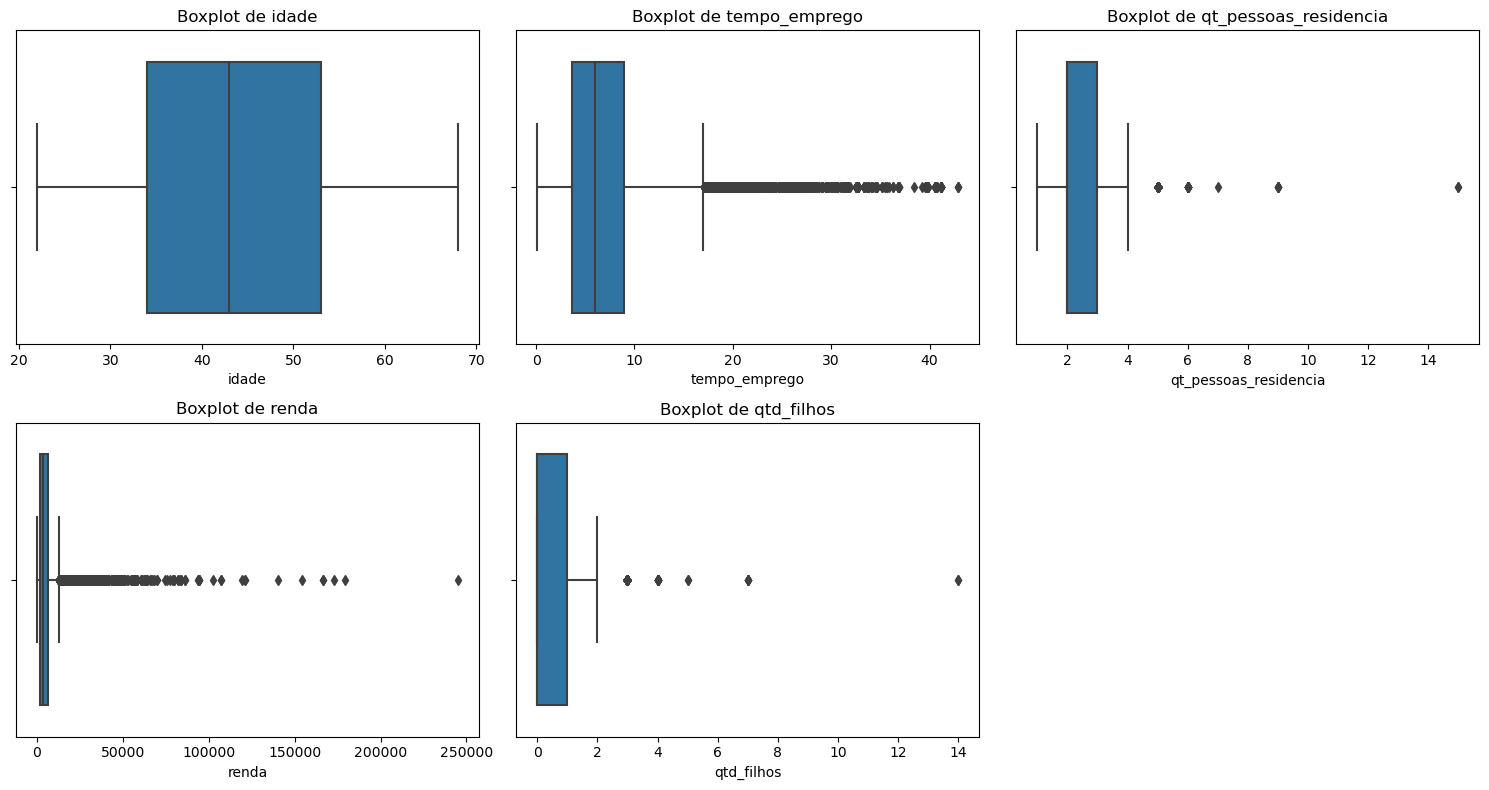

In [15]:
# Verificando presença de outliers nas variáveis numéricas usando boxplots
num_cols = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'qtd_filhos']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [16]:
# Tratando outliers nas variáveis numéricas usando o método do IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [19]:
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0.0,Empresário,Secundário,Solteiro,Casa,26.0,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0.0,Assalariado,Superior completo,Casado,Casa,28.0,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0.0,Empresário,Superior completo,Casado,Casa,35.0,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1.0,Servidor público,Superior completo,Casado,Casa,30.0,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0.0,Assalariado,Secundário,Solteiro,Governamental,33.0,4.293151,1.0,6475.97


In [20]:
# Definindo X (features) e y (target)
X = df.drop(columns=['renda', 'data_ref', 'id_cliente'])
y = df['renda']

# Transformação de variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

In [21]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Rodando o modelo


In [24]:
# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(X_test)

In [25]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 1920.85
RMSE: 2684.51
R²: 0.4518


In [37]:
from sklearn.model_selection import GridSearchCV

# Parâmetros para ajuste
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Instancia o modelo
rf = RandomForestRegressor(random_state=42)

# GridSearchCV para encontrar melhores hiperparâmetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MAE (negativo):", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Melhores parâmetros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor MAE (negativo): -2046.7407143639896


In [38]:
# Treinando o modelo RandomForestRegressor com os melhores parâmetros do grid_search
best_params = grid_search.best_params_
modelo_tuned = RandomForestRegressor(**best_params, random_state=42)
modelo_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=None, n_estimators=300,
                      random_state=42)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazendo previsões com o modelo ajustado (modelo_tuned)
y_pred_tuned = modelo_tuned.predict(X_test)

# Calculando métricas de avaliação
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"MAE (tuned): {mae_tuned:.2f}")
print(f"RMSE (tuned): {rmse_tuned:.2f}")
print(f"R² (tuned): {r2_tuned:.4f}")

MAE (tuned): 1913.01
RMSE (tuned): 2664.81
R² (tuned): 0.4598


## Etapa 5 Crisp-DM: Avaliação dos resultados


Avaliação do Modelo Random Forest (padrão):
MAE: 1920.85
RMSE: 2684.51
R²: 0.4518

Avaliação do Modelo Random Forest (ajustado com GridSearchCV):
MAE (tuned): 1913.01
RMSE (tuned): 2664.81
R² (tuned): 0.4598


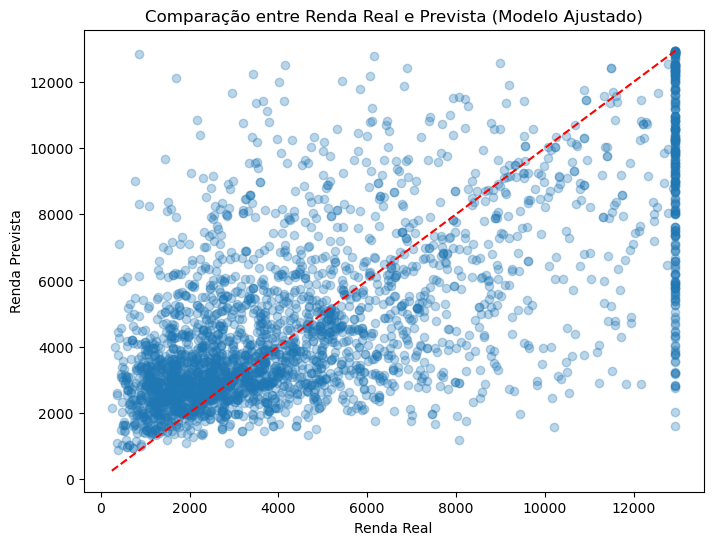

In [40]:
# Avaliação dos resultados do modelo ajustado

print("Avaliação do Modelo Random Forest (padrão):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}\n")

print("Avaliação do Modelo Random Forest (ajustado com GridSearchCV):")
print(f"MAE (tuned): {mae_tuned:.2f}")
print(f"RMSE (tuned): {rmse_tuned:.2f}")
print(f"R² (tuned): {r2_tuned:.4f}")

# Visualizando a comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.3)
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista')
plt.title('Comparação entre Renda Real e Prevista (Modelo Ajustado)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Interpretação:
- O ajuste de hiperparâmetros via GridSearchCV trouxe uma leve melhora nas métricas de erro (MAE e RMSE) e no R².
- O R² indica que cerca de 46% da variabilidade da renda é explicada pelo modelo ajustado, o que é razoável para dados socioeconômicos.
- Os valores de MAE (~1913) e RMSE (~2665) mostram que o erro médio das previsões está em torno desses valores em reais.

## Etapa 6 Crisp-DM: Implantação


Nesta etapa da implementação, foi realizada a criação de uma função chamada `prever_renda`, que utiliza o modelo de Random Forest ajustado (modelo_tuned) para prever a renda de novos clientes a partir de seus dados cadastrais. A função recebe um DataFrame com o mesmo formato das variáveis de entrada utilizadas no treinamento do modelo e retorna as previsões de renda correspondentes. Em seguida, a função foi utilizada para gerar previsões para o conjunto de teste (`X_test`), permitindo avaliar o desempenho do modelo em dados não vistos durante o treinamento. Por fim, as previsões geradas para os primeiros clientes do conjunto de teste foram exibidas, demonstrando como o modelo pode ser aplicado para estimar a renda de novos clientes de forma automatizada.

In [ ]:
def prever_renda(novos_dados, modelo=modelo_tuned):
    """
    Recebe um DataFrame com o mesmo formato de X e retorna a previsão de renda.
    """
    return modelo.predict(novos_dados)

In [45]:
teste = prever_renda(X_test)

In [48]:
print("Previsão de renda para os 5 primeiros clientes do conjunto de teste:")
print(teste)

Previsão de renda para os 5 primeiros clientes do conjunto de teste:
[ 2848.01211504  2346.23548857 10902.44567714 ...  2630.68253685
  7284.5655112   3622.04355037]


In [ ]:
comparacao = pd.DataFrame({
    'Renda Real': y_test.values,
    'Renda Prevista': teste
}, index=y_test.index)

comparacao.head()

,Renda Real,Renda Prevista
11499,3479.22000,2848.012115
6475,4867.69000,2346.235489
13167,12941.25375,10902.445677
862,707.96000,4211.176861
5970,4349.39000,4924.017835
